In [ ]:
import math as math
from math import gamma
import scipy.stats as sc
import matplotlib.pyplot as plt
from scipy.special import gammainc
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import autograd
from sympy import *
from scipy.stats import gompertz, gamma,expon,t,cauchy
import random
import pymc3 as pm

ModuleNotFoundError: ignored

In [ ]:
! pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.8/39.8 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 41.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.7 

In [ ]:
!pip install pymc==4.1.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.1/543.1 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 KB 5.2 MB/s eta 0:00:00
  Attempting uninstall: pymc
    Found existing installation: pymc 5.1.2
    Uninstalling pymc-5.1.2:
      Successfully uninstalled pymc-5.1.2


In [ ]:
def cdf(x,alpha=1.5,lamba=2.5,theta=1): ## CDF of Gamma Gompertz Distribtution
  num=gammainc(theta,lamba*(np.exp(alpha*x)-1)/alpha)
  deno=math.gamma(theta)
  #print(deno)
  return num/deno

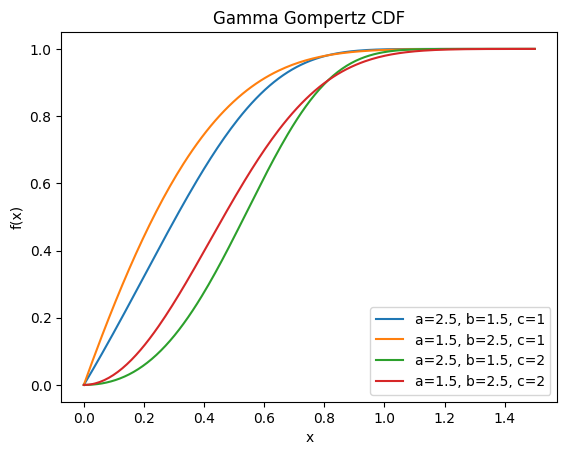

In [ ]:
# Define the range of x values to plot
x_values = np.linspace(0, 1.5, 200)

# Plot the PDF for different parameter values
for a, b, c in [(2.5, 1.5, 1), (1.5,2.5, 1), (2.5, 1.5, 2),(1.5,2.5,2)]:
    pdf_values = [cdf(x, a, b, c) for x in x_values]
    plt.plot(x_values, pdf_values, label=f"a={a}, b={b}, c={c}")

# Add labels and legend to the plot
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gamma Gompertz CDF")
plt.legend()

# Show the plot
plt.show()
#This code generates a plot of the gamma Gompertz PDF for three different parameter sets: (a=2, b=2, c=1), (a=4, b=1, c=2), and (a=1, b=3, c=1). The resulting plot shows how the shape, scale, and location parameters affect the shape of the distribution.


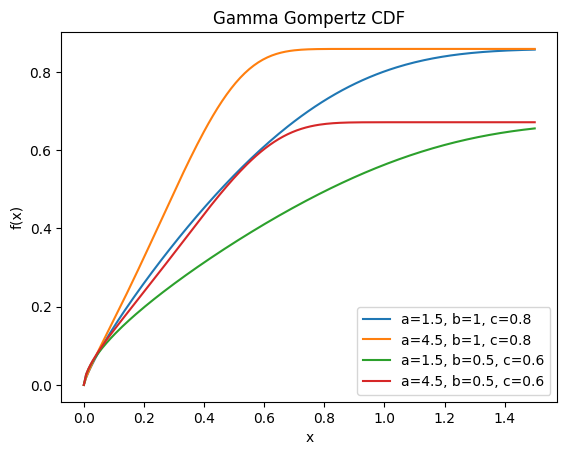

In [ ]:
# Define the range of x values to plot
x_values = np.linspace(0, 1.5, 200)

# Plot the PDF for different parameter values
for a, b, c in [(1.5, 1, 0.8), (4.5, 1, 0.8), (1.5, 0.5, 0.6),(4.5,.5,.6)]:
    pdf_values = [cdf(x, a, b, c) for x in x_values]
    plt.plot(x_values, pdf_values, label=f"a={a}, b={b}, c={c}")

# Add labels and legend to the plot
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gamma Gompertz CDF")
plt.legend()

# Show the plot
plt.show()
#This code generates a plot of the gamma Gompertz PDF for three different parameter sets: (a=2, b=2, c=1), (a=4, b=1, c=2), and (a=1, b=3, c=1). The resulting plot shows how the shape, scale, and location parameters affect the shape of the distribution.


In [ ]:
def ggo_pdf(x, alpha=2.5, lamba=1.5, theta=1):
    #if x < 0:
        #return 0
    #else:
        pdf = lamba/math.gamma(theta)*(np.exp(alpha*x-(lamba/alpha)*(np.exp(alpha*x)-1)))*(((lamba/alpha)*(np.exp(alpha*x)-1))**(theta-1))
        return pdf

In [ ]:
ggo_pdf(0)

1.5

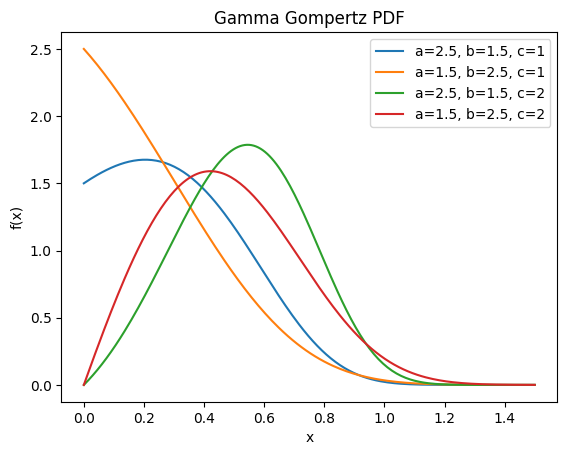

In [ ]:
# Define the range of x values to plot
x_values = np.linspace(0, 1.5, 200)

# Plot the PDF for different parameter values
for a, b, c in [(2.5, 1.5, 1), (1.5,2.5, 1), (2.5, 1.5, 2),(1.5,2.5,2)]:
    pdf_values = [ggo_pdf(x, a, b, c) for x in x_values]
    plt.plot(x_values, pdf_values, label=f"a={a}, b={b}, c={c}")

# Add labels and legend to the plot
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gamma Gompertz PDF")
plt.legend()

# Show the plot
plt.show()
#This code generates a plot of the gamma Gompertz PDF for three different parameter sets: (a=2, b=2, c=1), (a=4, b=1, c=2), and (a=1, b=3, c=1). The resulting plot shows how the shape, scale, and location parameters affect the shape of the distribution.






<ipython-input-5-a8e8a8490f0c>:5: RuntimeWarning: divide by zero encountered in double_scalars
  pdf = lamba/math.gamma(theta)*(np.exp(alpha*x-(lamba/alpha)*(np.exp(alpha*x)-1)))*(((lamba/alpha)*(np.exp(alpha*x)-1))**(theta-1))


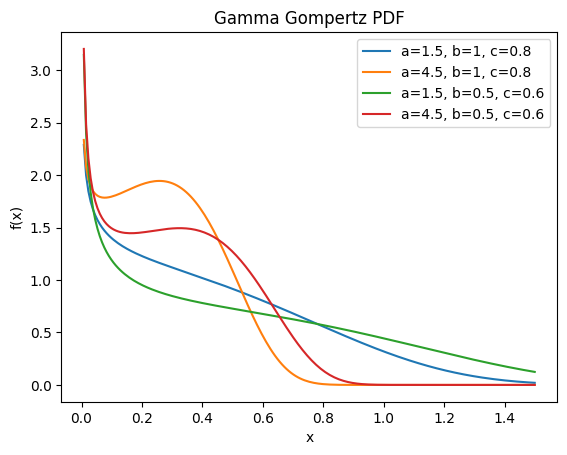

In [ ]:
# Define the range of x values to plot
x_values = np.linspace(0, 1.5, 200)

# Plot the PDF for different parameter values
for a, b, c in [(1.5, 1, 0.8), (4.5, 1, 0.8), (1.5, 0.5, 0.6),(4.5,.5,.6)]:
    pdf_values = [ggo_pdf(x, a, b, c) for x in x_values]
    plt.plot(x_values, pdf_values, label=f"a={a}, b={b}, c={c}")

# Add labels and legend to the plot
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gamma Gompertz PDF")
plt.legend()

# Show the plot
plt.show()
#This code generates a plot of the gamma Gompertz PDF for three different parameter sets: (a=2, b=2, c=1), (a=4, b=1, c=2), and (a=1, b=3, c=1). The resulting plot shows how the shape, scale, and location parameters affect the shape of the distribution.


In [ ]:
import numpy as np
from scipy.stats import gamma

#def gamma_gompertz_pdf(x, a, b, c):
    #return a * b * c * np.exp(-a * np.exp(b*x)) * np.exp(-c*x) * gamma.pdf(a, c/b)

def gamma_gompertz_sample(n, a, b, c):
    # Define the proposal distribution as a gamma distribution
    #if(c==1):
      #samples=expon(1/c).rvs()
    #C = a * b * c * cauch.pdf(0)
    proposal_dist = gamma(a,1/b)
    samples = []
    while len(samples) < n:
        # Sample from the proposal distribution
        x = proposal_dist.rvs()
        # Calculate the acceptance probability
        acceptance_prob = ggo_pdf(x, a, b, c) / (proposal_dist.pdf(x))
        # Accept or reject the sample based on the acceptance probability
        if np.random.uniform() < acceptance_prob and x>0:
            samples.append(x)
    return np.array(samples)



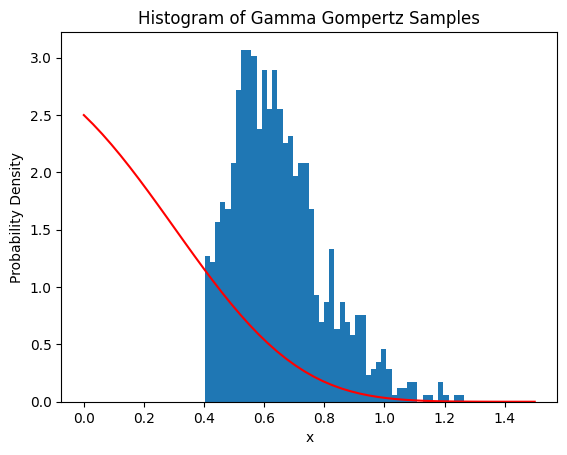

In [ ]:
import matplotlib.pyplot as plt

# Define the parameters of the gamma Gompertz distribution
a = 1.5
b = 2.5
c = 1

# Generate 10,000 samples from the gamma Gompertz distribution using the acceptance-rejection algorithm
samples = gamma_gompertz_sample(1000, a, b, c)

# Plot a histogram of the samples
fig, ax = plt.subplots()
ax.hist(samples, bins=50, density=True)

# Add a plot of the gamma Gompertz PDF for comparison
x = np.linspace(0, 1.5, 50)
y = ggo_pdf(x, a, b, c)
ax.plot(x, y, color='red')

# Set the plot title and labels
ax.set_title('Histogram of Gamma Gompertz Samples')
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')

# Show the plot
plt.show()


In [ ]:
sc.ks_1samp(samples,cdf).pvalue

0.0

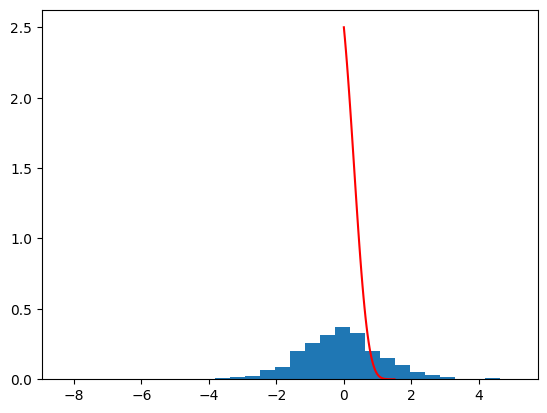

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0, 1.5, 50)
y = ggo_pdf(x, a, b, c)
data = t.rvs(df=5, size=1000)
count, bins, ignored = plt.hist(data, 30, density=True)
ax.plot(x, y, color='red')
plt.show()

In [ ]:
sc.ks_1samp(samples,cdf).pvalue

0.0

In [ ]:
def gamma_gompertz_sample_2(n, a, b, c):
    # Define the maximum value of the PDF
    max_pdf = ggo_pdf(a/(2*b), a, b, c)
    samples = []
    while len(samples) < n:
        # Generate a candidate sample from the proposal distribution (exponential)
        y = np.random.exponential(scale=1/b)
        # Calculate the acceptance probability
        u = np.random.uniform()
        if u < ggo_pdf(y, a, b, c) / (max_pdf * np.exp(-c*y)):
            samples.append(y)
    return np.array(samples)

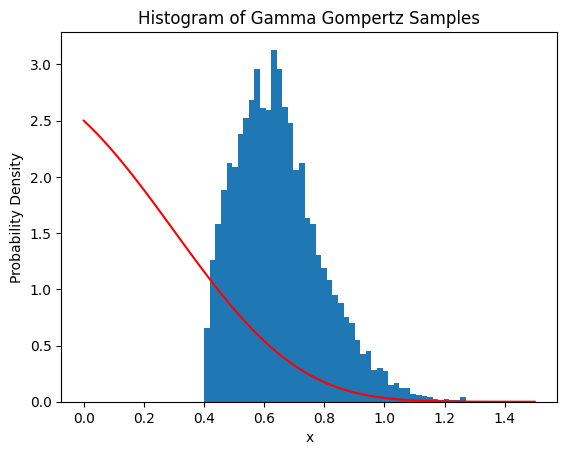

In [ ]:
# Define the parameters of the gamma Gompertz distribution
a = 1.5
b = 2.5
c = 1

# Generate 10,000 samples from the gamma Gompertz distribution using the rejection sampling algorithm
samples = gamma_gompertz_sample(10000, a, b, c)

# Plot a histogram of the samples
fig, ax = plt.subplots()
ax.hist(samples, bins=50, density=True)

# Add a plot of the gamma Gompertz PDF for comparison
x = np.linspace(0, 1.5, 100)
y = ggo_pdf(x, a, b, c)
ax.plot(x, y, color='red')

# Set the plot title and labels
ax.set_title('Histogram of Gamma Gompertz Samples')
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')

# Show the plot
plt.show()

In [ ]:
sc.ks_1samp(samples,cdf).pvalue

0.0

In [ ]:
def metropolis_hastings_gamma_gompertz(n, a, b, c, burn_in=100000, thin=10):
    # Initialize the chain
    x = 1
    samples = []
    # Perform burn-in iterations
    for i in range(burn_in):
        # Generate a proposal from a normal distribution
        #y=-1
        #while(y<0):
        y = x + np.random.normal()
        # Calculate the acceptance probability
        alpha = min(1, ggo_pdf(y, a, b, c) / ggo_pdf(x, a, b, c))
        # Accept or reject the proposal
        u = np.random.uniform()
        if u < alpha:
            x = y
    # Perform the remaining iterations and store the samples
    for i in range(n):
        # Generate a proposal from a normal distribution
        #y=-1
        #while(y<0):
        y = x + np.random.normal()
        # Calculate the acceptance probability
        alpha = min(1, ggo_pdf(y, a, b, c) / ggo_pdf(x, a, b, c))
        # Accept or reject the proposal
        u = np.random.uniform()
        if u < alpha:
            x = y
        # Store the sample
        if i % thin == 0 and x>0:
            #print("yes\n")
            samples.append(x)
    return np.array(samples)

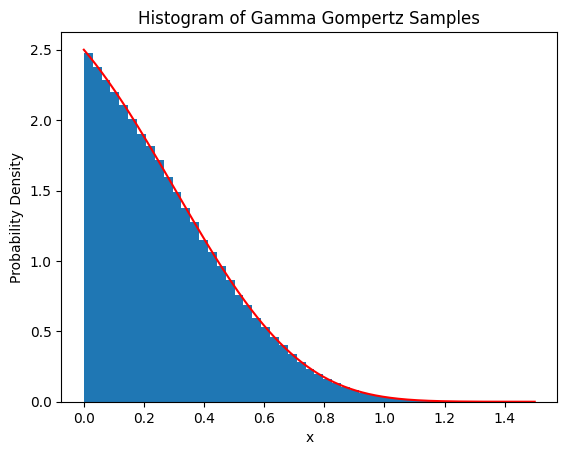

In [ ]:
# Generate 10,000 samples from the gamma Gompertz distribution using the Metropolis-Hastings algorithm
a = 1.5
b = 2.5
c = 1

samples=[]
samples = metropolis_hastings_gamma_gompertz(20000000, a, b, c)

# Plot a histogram of the samples
fig, ax = plt.subplots()
ax.hist(samples, bins=50, density=True)

# Add a plot of the gamma Gompertz PDF for comparison
x = np.linspace(0, 1.5, 1000)
y = ggo_pdf(x, a, b, c)
ax.plot(x, y, color='red')

# Set the plot title and labels
ax.set_title('Histogram of Gamma Gompertz Samples')
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')

# Show the plot
plt.show()

In [ ]:
samples.size()

TypeError: ignored

In [ ]:
sc.ks_1samp(samples,cdf).pvalue

0.6276597246167486

In [ ]:
data1=random.choices(samples,k=20)

In [ ]:
def my_prior(a,b,c):
  return -(a+b+c)

In [ ]:
def log_likelihood(a,b,c,data1):
  data1=np.array(data1)
  m=len(data1)
  l=(m*b)/a+m*np.log(a)-m*c*(np.log(b))-m*np.log(gamma(c))
  for i in range(m):
    l+=a*data1[i]+(c-1)*(np.log(np.exp(a*data1[i])-1))-(b/a)*np.exp(a*data1[i])
  return l  

In [ ]:
def likelihood(x,a,b,c,data1):
  return np.exp(log_likelihood(x,a,b,c,data1))

In [ ]:
import pymc as pm4
#import numpy as np

# Generate some example data
np.random.seed(123)
x = data1 # Random data points between 0 and 10

# Define the log-likelihood function for the gamma Gompertz distribution
def ggo_log_likelihood(x, alpha, lamba, theta):
    """
    Log-likelihood of the gamma Gompertz distribution.

    Parameters
    ----------
    x : array-like
        Data.
    alpha : float
        Shape parameter.
    lamba : float
        Scale parameter.
    theta : float
        Shape parameter.

    Returns
    -------
    log_likelihood : float
        Log-likelihood of the data given the parameters.
    """
    pdf = lamba / pm4.math.gamma(theta) * (np.exp(alpha * x - (lamba / alpha) * (np.exp(alpha * x) - 1))) * (
            ((lamba / alpha) * (np.exp(alpha * x) - 1)) ** (theta - 1))
    return pm4.math.log(pdf)

# Define the prior distributions for the parameters
with pm4.Model() as model:
    alpha = pm4.Exponential('alpha', 1.0)
    lamba = pm4.Exponential('lamba', 1.0)
    theta = pm4.Exponential('theta', 1.0)
    likelihood = pm4.DensityDist('likelihood', logp=ggo_log_likelihood, observed=(alpha,beta,theta))

    # Perform Bayesian inference using MCMC
    trace = pm4.sample(1000, tune=1000, chains=1, cores=1)

# Access the posterior means
alpha_mean = np.mean(trace['alpha'])
lamba_mean = np.mean(trace['lamba'])
theta_mean = np.mean(trace['theta'])

print("Posterior mean of alpha:", alpha_mean)
print("Posterior mean of lamba:", lamba_mean)
print("Posterior mean of theta:", theta_mean)



ValueError: ignored